In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\hinaa\\Documents\\ML_Projects\\Ablone_Dataset_Linear_Regression\\abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df['Height'] = (df['Height'] - min(df['Height'])) / (max(df['Height']) - min(df['Height']))
df['Height']

0       0.084071
1       0.079646
2       0.119469
3       0.110619
4       0.070796
          ...   
4172    0.146018
4173    0.119469
4174    0.181416
4175    0.132743
4176    0.172566
Name: Height, Length: 4177, dtype: float64

In [5]:
# Outlier detection and removal
height_column = df['Height']
rings_column = df['Rings']

# Calculate the first quartile (Q1) and third quartile (Q3) for Height
Q1_height = height_column.quantile(0.25)
Q3_height = height_column.quantile(0.75)
IQR_height = Q3_height - Q1_height

# Define the lower and upper bounds for outliers for Height
lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

# Calculate the first quartile (Q1) and third quartile (Q3) for Rings
Q1_rings = rings_column.quantile(0.25)
Q3_rings = rings_column.quantile(0.75)
IQR_rings = Q3_rings - Q1_rings

# Define the lower and upper bounds for outliers for Rings
lower_bound_rings = Q1_rings - 1.5 * IQR_rings
upper_bound_rings = Q3_rings + 1.5 * IQR_rings

# Find outliers for both Height and Rings
outliers_height = height_column[(height_column < lower_bound_height) | (height_column > upper_bound_height)]
outliers_rings = rings_column[(rings_column < lower_bound_rings) | (rings_column > upper_bound_rings)]

# Remove outliers
df_no_outliers = df[~((df['Height'] < lower_bound_height) | (df['Height'] > upper_bound_height) | 
                      (df['Rings'] < lower_bound_rings) | (df['Rings'] > upper_bound_rings))]

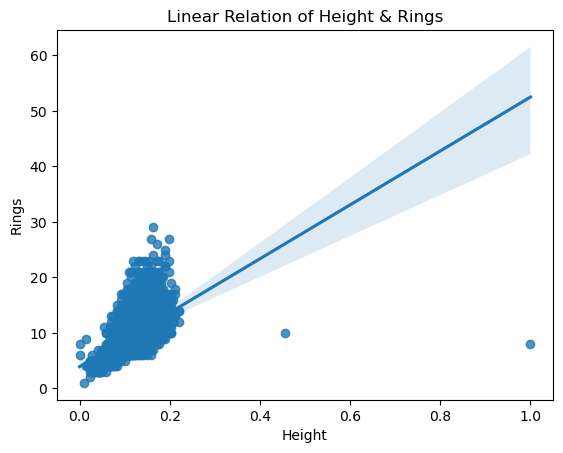

In [6]:
sns.regplot(data=df, x='Height', y='Rings')
plt.title("Linear Relation of Height & Rings")
plt.show()

In [7]:
print("Correlation between Height and Rings:", df['Height'].corr(df['Rings']))

Correlation between Height and Rings: 0.5574673244580369


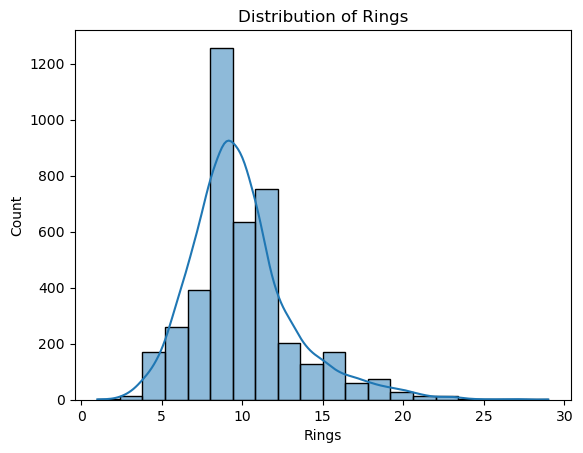

In [8]:
sns.histplot(df['Rings'], bins=20, kde=True)
plt.title("Distribution of Rings")
plt.show()

In [12]:
X = df[['Height']]
y = df['Rings']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2529)
print("The shape of X_train :", X_train.shape)
print("The shape of X_test :", X_test.shape)
print("The shape of y_train :", y_train.shape)
print("The shape of y_test :", y_test.shape)


The shape of X_train : (3341, 1)
The shape of X_test : (836, 1)
The shape of y_train : (3341,)
The shape of y_test : (836,)


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_predict = lr.predict(X_test)

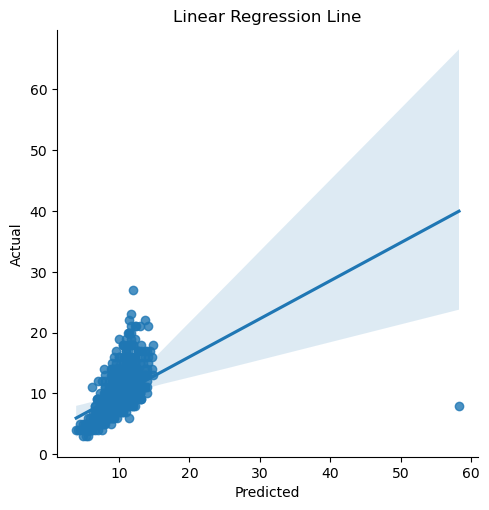

In [16]:
data = pd.DataFrame({'Predicted': y_predict, 'Actual': y_test})
sns.lmplot(x='Predicted', y='Actual', data=data)
plt.title("Linear Regression Line")
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
error = mean_absolute_percentage_error(y_predict, y_test)
accuracy = (1 - error) * 100
print("Accuracy of Linear Regression is: {:.2f}%".format(accuracy))

Accuracy of Linear Regression is: 81.69%


In [19]:
r2 = r2_score(y_test, y_predict)
print("Squared R (R²):", r2)


Squared R (R²): 0.15084982973452643


In [20]:
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 9.078655531167595
